In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import emoji
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

warnings.filterwarnings('ignore')
nltk.download('stopwords')
sns.set(style="whitegrid")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\skibi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
data80 = pd.read_csv('USdata80.csv', encoding='cp1252', lineterminator='\n')
#data90 = pd.read_csv('USdata90.csv', encoding='cp1252', lineterminator='\n')
#data95 = pd.read_csv('USdata95.csv', encoding='cp1252', lineterminator='\n')

In [42]:
data80.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115391 entries, 0 to 115390
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         115391 non-null  int64  
 1   video_id           115391 non-null  object 
 2   title              115391 non-null  object 
 3   publishedAt        115391 non-null  object 
 4   channelId          115391 non-null  object 
 5   channelTitle       115391 non-null  object 
 6   categoryId         23027 non-null   float64
 7   trending_date      115391 non-null  object 
 8   tags               115391 non-null  object 
 9   view_count         115391 non-null  int64  
 10  likes              115391 non-null  int64  
 11  dislikes           115391 non-null  int64  
 12  comment_count      115391 non-null  int64  
 13  thumbnail_link     115391 non-null  object 
 14  comments_disabled  115391 non-null  bool   
 15  ratings_disabled   115391 non-null  bool   
       

In [43]:
data80.head()

,Unnamed: 0,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description\r
0,0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,NaN,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ? http://bit.ly/Subscrib...
1,1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20.0,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,NaN,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,NaN,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL ? http://bit.ly/subscribe-xxl...
4,4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,NaN,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [44]:
data80.describe()

,Unnamed: 0,categoryId,view_count,likes,dislikes,comment_count
count,115391.000000,23027.000000,1.153910e+05,1.153910e+05,115391.000000,1.153910e+05
mean,57695.000000,18.687671,2.714130e+06,1.476603e+05,2642.138858,1.244248e+04
std,33310.656793,6.892449,7.033984e+06,4.152476e+05,12118.721758,8.883184e+04
min,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,28847.500000,17.000000,5.252325e+05,2.110200e+04,212.000000,1.535000e+03
50%,57695.000000,20.000000,1.079336e+06,5.073500e+04,645.000000,3.525000e+03
75%,86542.500000,24.000000,2.422794e+06,1.286290e+05,1825.000000,8.488000e+03
max,115390.000000,29.000000,2.644074e+08,1.602153e+07,879354.000000,6.738537e+06


<font size="5"><b>Podsumowanie danych, wstępne statystyki</b></font>

In [45]:
print ("\nLiczba brakujących wartości:", data80.isnull().sum().values.sum())
print ("\nLiczba unikalnych wartości:\n", data80.nunique())


Liczba brakujących wartości: 92364

Liczba unikalnych wartości:
 Unnamed: 0           115391
video_id              20831
title                 21284
publishedAt           20514
channelId              5238
channelTitle           5322
categoryId               15
trending_date           557
tags                  15343
view_count           112973
likes                 84931
dislikes              13179
comment_count         27202
thumbnail_link        20831
comments_disabled         2
ratings_disabled          2
description\r         21309
dtype: int64


In [46]:
print("Ile razy dany kanał znalazł się w Trending")
data80['channelId'].value_counts()

Ile razy dany kanał znalazł się w Trending


UCDVYQ4Zhbm3S2dlz7P1GBDg    809
UCWJ2lWNubArHWmf3FIHbfcQ    679
UCpB959t8iPrxQWj7G6n0ctQ    549
UCIPPMRA040LQr5QPyJEbmXA    415
UCke6I9N4KfC968-yRcd5YRg    410
                           ... 
UCFLwN7vRu8M057qJF8TsBaA      1
UCclt4BVZbsNCChePuT43QdA      1
UCMkfcY0uNTa7hccthSooPnQ      1
UC-HWZs7YOICL0h--kGSRuTg      1
UCsgQqAJC8z09sVFPs8-KKrQ      1
Name: channelId, Length: 5238, dtype: int64

In [47]:
print("Ile razy dany film znalazł się w Trending")
data80['video_id'].value_counts()

Ile razy dany film znalazł się w Trending


hdmx71UjBXs    36
aONT7atzqfw    35
wY6UyatwVTA    34
mcUpeaSX8BE    34
vrRfBmMWpLY    33
               ..
uKRXOaBQMzU     1
ZdKuso-s7qs     1
dDvS1_EXvnc     1
qGfiAA9Dlio     1
h2UN0EtuY1g     1
Name: video_id, Length: 20831, dtype: int64

In [48]:
print("Brakujące wartości w poszczególnych cechach")
data80.isna().sum()

Brakujące wartości w poszczególnych cechach


Unnamed: 0               0
video_id                 0
title                    0
publishedAt              0
channelId                0
channelTitle             0
categoryId           92364
trending_date            0
tags                     0
view_count               0
likes                    0
dislikes                 0
comment_count            0
thumbnail_link           0
comments_disabled        0
ratings_disabled         0
description\r            0
dtype: int64

In [49]:
print("Liczba filmów w danej kategorii")
data80['categoryId'].value_counts()

Liczba filmów w danej kategorii


24.0    4553
10.0    4116
20.0    4030
17.0    2527
22.0    2063
23.0    1305
1.0     1016
25.0     894
26.0     760
28.0     699
27.0     534
2.0      359
19.0      94
15.0      66
29.0      11
Name: categoryId, dtype: int64

<AxesSubplot:title={'center':'Regresja liniowa między oglądalnością a liczbą polubień'}, xlabel='view_count', ylabel='likes'>

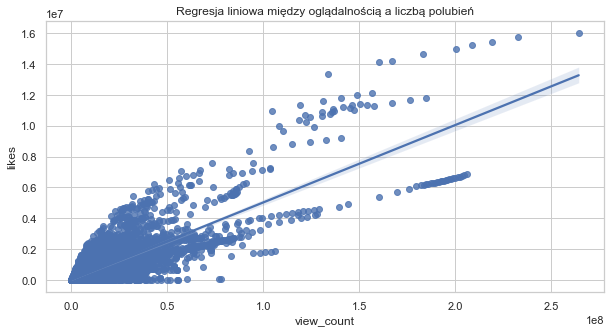

In [50]:
plt.figure(figsize=(10,5))
plt.title('Regresja liniowa między oglądalnością a liczbą polubień')
sns.regplot(data=data80, x='view_count', y='likes')

In [51]:
print("Korelacja pomiędzy atrybutami liczbowymi")
corr= data80[['likes', 'dislikes', 'comment_count', 'view_count']]
corr.corr()

Korelacja pomiędzy atrybutami liczbowymi


,likes,dislikes,comment_count,view_count
likes,1.000000,0.636525,0.693102,0.849516
dislikes,0.636525,1.000000,0.521355,0.671340
comment_count,0.693102,0.521355,1.000000,0.520759
view_count,0.849516,0.671340,0.520759,1.000000


<AxesSubplot:>

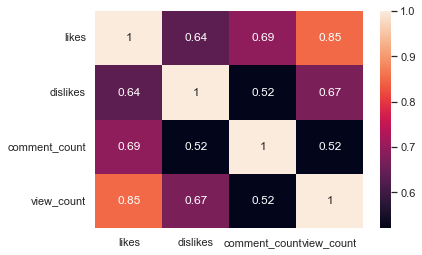

In [52]:
sns.heatmap(corr.corr(), annot= True)

<AxesSubplot:title={'center':'Oglądalność względem kategorii'}, xlabel='categoryId', ylabel='view_count'>

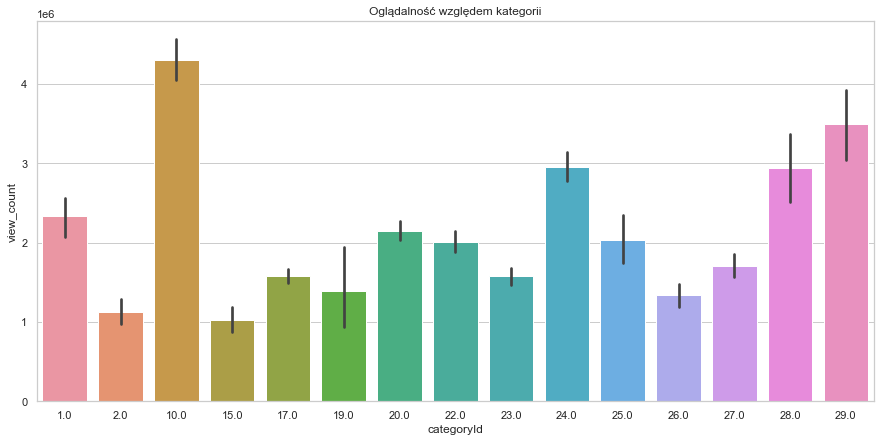

In [53]:
plt.figure(figsize=(15,7))
plt.title("Oglądalność względem kategorii")
sns.barplot(x="categoryId", y="view_count", data=data80)

<AxesSubplot:title={'center':'Ilość komentarzy względem kategorii'}, xlabel='categoryId', ylabel='comment_count'>

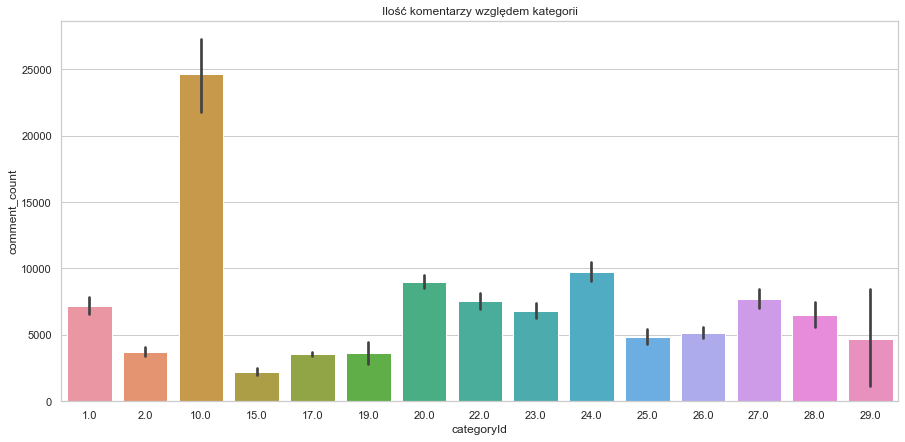

In [54]:
plt.figure(figsize=(15,7))
plt.title("Ilość komentarzy względem kategorii")
sns.barplot(x="categoryId", y="comment_count", data=data80)

<AxesSubplot:title={'center':'Komentarze włączone vs wyłączone'}, xlabel='comments_disabled', ylabel='count'>

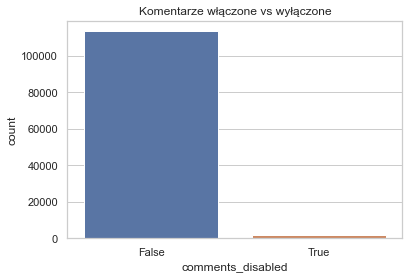

In [55]:
plt.title("Komentarze włączone vs wyłączone")
sns.countplot(x="comments_disabled", data=data80)

<AxesSubplot:title={'center':'Ocenianie włączone vs wyłączone'}, xlabel='ratings_disabled', ylabel='count'>

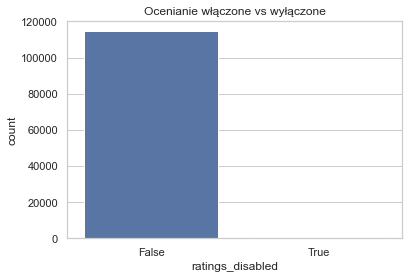

In [56]:
plt.title("Ocenianie włączone vs wyłączone")
sns.countplot(x="ratings_disabled", data=data80)

<font size="5"><b>Zmiana reprezentacji danych</b></font>

In [57]:
df = data80[["video_id", "title", "publishedAt", "channelTitle", "categoryId", "tags", "description\r"]]

In [58]:
df.rename(columns={"description\r":"description"}, inplace=True)
df

,video_id,title,publishedAt,channelTitle,categoryId,tags,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,Brawadis,NaN,brawadis|prank|basketball|skits|ghost|funny vi...,SUBSCRIBE to BRAWADIS ? http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,Apex Legends,20.0,Apex Legends|Apex Legends characters|new Apex ...,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,jacksepticeye,NaN,jacksepticeye|funny|funny meme|memes|jacksepti...,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,XXL,NaN,xxl freshman|xxl freshmen|2020 xxl freshman|20...,Subscribe to XXL ? http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,Mr. Kate,NaN,The LaBrant Family|DIY|Interior Design|Makeove...,Transforming The LaBrant Family's empty white ...
...,...,...,...,...,...,...,...
115386,6WUxgmMDts4,"Blowing up Capacitors at 187,000FPS",2022-03-01T12:20:37Z,The Slow Mo Guys,NaN,slomo|slow|mo|super|motion|Slow Motion|1000|10...,Gav and Dan overload some capacitors and film ...
115387,6-aGt23ytyI,Most Extreme Sports!,2022-02-28T21:00:02Z,Beast Reacts,NaN,life hacks|crafts|slime|do it yourself|diy|lif...,Like normal sports but EXTREME!CHECK OUT THESE...
115388,vPgrkl7lEjU,The Batman - Movie Review,2022-02-28T17:00:39Z,Chris Stuckmann,NaN,The Batman|Reviews|Movie Review|Chris Stuckman...,The Shelby Oaks Kickstarter is LIVE: https://w...
115389,6Svr8l1DwTc,which enderman will survive?,2022-03-01T17:00:04Z,Spider,NaN,[None],#minecraft #meme #memes\r


In [59]:
df['publishedAt'] = pd.to_datetime(df['publishedAt'])

In [60]:
#Godzina publikacji 
df["publishedAt_hour"] = df['publishedAt'].dt.hour

<AxesSubplot:title={'center':'Godzina dodania filmów'}, xlabel='publishedAt_hour', ylabel='count'>

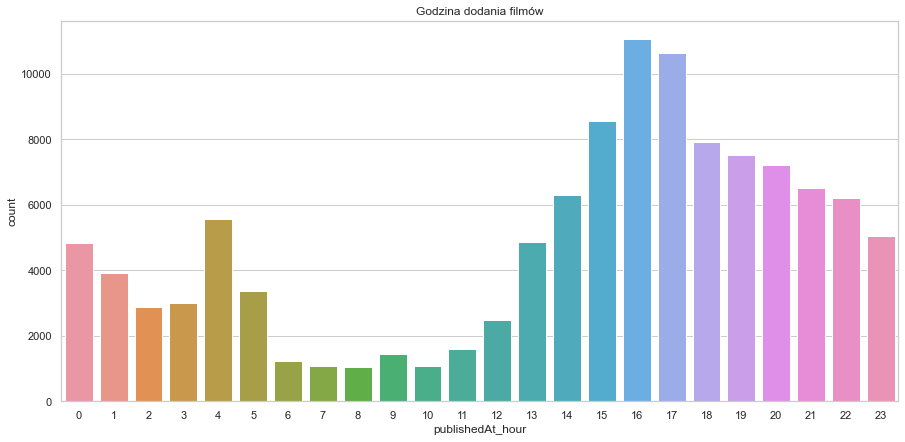

In [61]:
plt.figure(figsize=(15,7))
plt.title("Godzina dodania filmów")
sns.countplot(df["publishedAt_hour"])

In [62]:
#Długość tytułu
df['title_len'] = df['title'].apply(lambda x: len(x))
df['title_len']

0         34
1         60
2         53
3         56
4         55
          ..
115386    35
115387    20
115388    25
115389    28
115390    28
Name: title_len, Length: 115391, dtype: int64

<AxesSubplot:title={'center':'Długość tytułu'}, xlabel='title_len', ylabel='Count'>

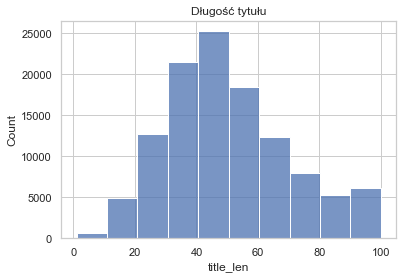

In [63]:
plt.title("Długość tytułu")
sns.histplot(data=df, x='title_len', bins=10)

<AxesSubplot:title={'center':'Czy tytuł został napisany wielkimi literami'}, xlabel='title_capitalised', ylabel='count'>

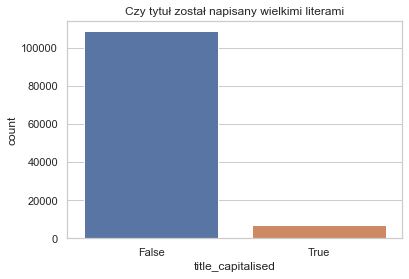

In [64]:
#czy tytuł jest napisany wielkimi literami
df['title_capitalised'] = df['title'].apply(lambda x: x.isupper())
plt.title("Czy tytuł został napisany wielkimi literami")
sns.countplot(x="title_capitalised", data=df)

In [65]:
#Czy tytuł posiada emoji -> brak, nie dodalem jako cechy
def text_has_emoji(text):   
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return character
    return False
            
df['title'].apply(text_has_emoji)#.nunique()

0         False
1         False
2         False
3         False
4         False
          ...  
115386    False
115387    False
115388    False
115389    False
115390    False
Name: title, Length: 115391, dtype: bool

<AxesSubplot:title={'center':'Czy tytuł posiada znaki interpunkcyjne?'}, xlabel='title_punctuation', ylabel='count'>

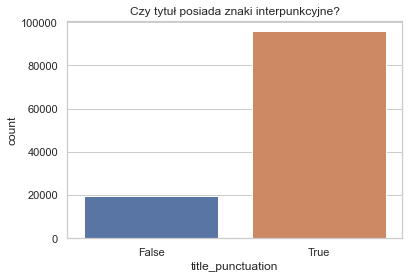

In [66]:
#czy tytuł posiada znaki interpunkcyjne
puncts = string.punctuation # ['?', '!']
def text_has_punctuation(text):
    for character in text:
        if character in puncts:
            return True
    return False

df['title_punctuation'] = df['title'].apply(text_has_punctuation)
plt.title("Czy tytuł posiada znaki interpunkcyjne?")
sns.countplot(df['title_punctuation'])

In [67]:
#czy opis posiada emoji - też tylko False// dziwne
            
df['description'].apply(text_has_emoji).value_counts()

False    115391
Name: description, dtype: int64

<AxesSubplot:title={'center':'Czy opis posiada zdanie napisane wielkimi literami'}, xlabel='description_capitalised', ylabel='count'>

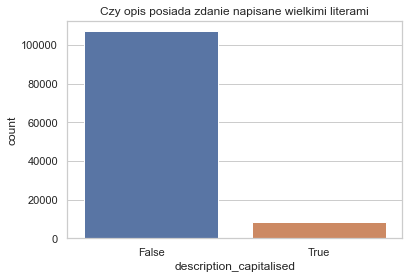

In [68]:
#czy opis posiada zdanie napisane wielkimi literami
def check_capitalise(description):
    sentences = description.split(".")
    for sentence in sentences:
        if sentence.isupper():
            return True
    return False

df['description_capitalised'] = df['description'].apply(check_capitalise)


plt.title("Czy opis posiada zdanie napisane wielkimi literami")
sns.countplot(x="description_capitalised", data=df)

<AxesSubplot:title={'center':'Czy opis posiada znaki interpunkcyjne?'}, xlabel='description_punctuation', ylabel='count'>

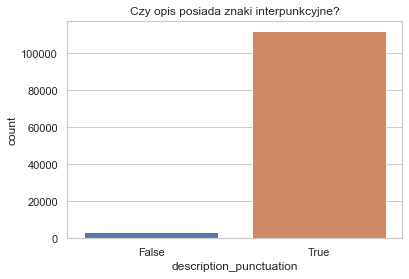

In [69]:
#czy opis posiada znaki interpunkcyjne
puncts = string.punctuation # ['?', '!']
def text_has_punctuation(text):
    for character in text:
        if character in puncts:
            return True
    return False

df['description_punctuation'] = df['description'].apply(text_has_punctuation)
plt.title("Czy opis posiada znaki interpunkcyjne?")
sns.countplot(df['description_punctuation'])

<AxesSubplot:title={'center':'Długość opisu'}, xlabel='description_len', ylabel='Count'>

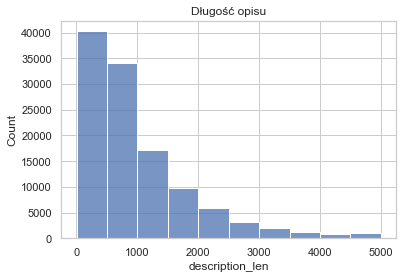

In [70]:
#Długość opisu 
df['description_len'] = df['description'].apply(lambda x: len(x))
plt.title("Długość opisu")
sns.histplot(data=df, x='description_len', bins=10)

In [71]:
#Najczesciej wystepujace slowa
merged_tags = ''.join(df['tags'])
tags = re.sub('[^a-zA-Z]', ' ', merged_tags) #usuń znaki specjalne
tags = re.compile(r"\s+").sub(" ", tags).strip() #usuń nadmiarowe spacje
tags_tokens = word_tokenize(tags)
tags_tokens = [t.lower() for t in tags_tokens]

stop_words = set(stopwords.words('english'))

filtered_tags = [t for t in tags_tokens if not t in stop_words ]


tags = Counter(filtered_tags)

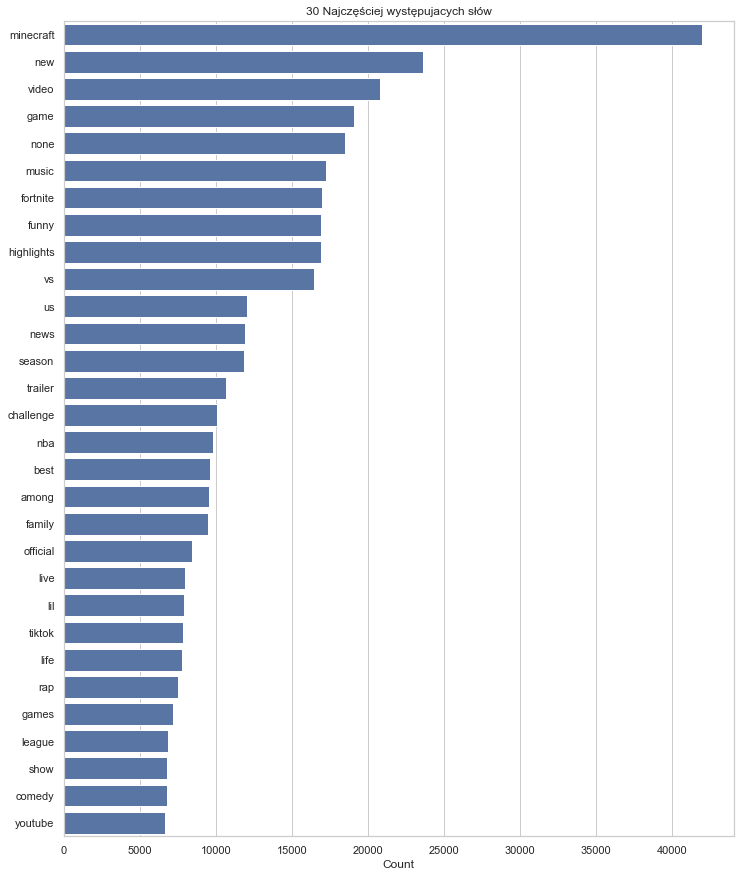

In [72]:
def show_histogram(word_counts, title=None):

    plot_df = pd.DataFrame.from_dict(word_counts).rename(columns={0:'Token', 1:'Count'})
    
    f, ax = plt.subplots(figsize=(12, 15))
    p = sns.barplot(x="Count", y="Token", data=plot_df, color="b")
    p.set(xlabel="Count", ylabel="", title=title)
    
show_histogram(tags.most_common(30), "30 Najczęściej występujacych słów")

In [73]:
#Przygotowanie tagów pod wykrycie kategorii
def filter_tag(tag):
    tags = re.sub('[^a-zA-Z]', ' ', tag) #usuń znaki specjalne
    tags = re.compile(r"\s+").sub(" ", tags).strip() #usuń nadmiarowe spacje
    tags_tokens = word_tokenize(tags)
    tags_tokens = [t.lower() for t in tags_tokens]

    stop_words = set(stopwords.words('english'))

    filtered_tags = [t for t in tags_tokens if not t in stop_words]
    return set(filtered_tags)

df['filtered_tags'] = df['tags'].apply(filter_tag)

<AxesSubplot:title={'center':'Ilość informatywnych tagów'}, xlabel='tags_len', ylabel='Count'>

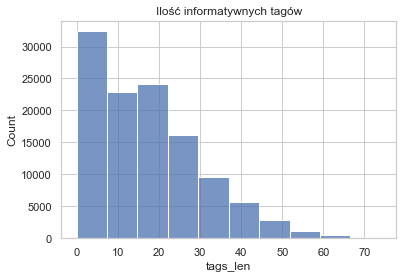

In [74]:
#Ilość unikalnych tagów
df['tags_len'] = df['filtered_tags'].apply(lambda x: len(x))
plt.title("Ilość informatywnych tagów")
sns.histplot(data=df, x='tags_len', bins=10)

In [75]:
df.drop(['title', 'channelTitle', 'tags', 'description', 'publishedAt'], axis=1).head(8)

,video_id,categoryId,publishedAt_hour,title_len,title_capitalised,title_punctuation,description_capitalised,description_punctuation,description_len,filtered_tags,tags_len
0,3C66w5Z0ixs,NaN,19,34,True,True,False,True,362,"{prank, funny, brother, mama, ghost, videos, n...",18
1,M9Pmf9AB4Mo,20.0,17,60,False,True,False,True,716,"{fun, titanfall, origin, royale, multiplayer, ...",27
2,J78aPJ3VyNs,NaN,16,53,False,True,False,True,514,"{compilation, dank, fan, memes, jacksepticeye,...",23
3,kXLn3HkpjaA,NaN,16,56,False,True,False,True,763,"{rapper, hip, keem, xxl, rap, wave, g, baby, c...",28
4,VIUo6yapDbc,NaN,15,55,False,True,False,True,2494,"{movie, theater, savannah, makeover, mr, colla...",38
5,w-aidBdvZo8,24.0,20,56,False,True,True,True,1390,"{professorlive, v, professor, achilles, injury...",6
6,uet14uf9NsE,26.0,0,24,True,True,False,True,579,{none},1
7,ua4QMFQATco,27.0,17,18,False,False,False,True,1237,"{hello, cgpgrey, internet, education}",4


In [76]:
#TODO
#zapisac df
'''dorobic jeszcze do 1. etapu ilosc dni pod rzad w trending (jednoczesnie eliminujac powtorzenia danych filmow) 

wspolczynnik responsywnosci (lajki/komentarze do wyswietlen )
Złapać jeszcze tagi w kategorie (gry, podroze itp. )
przypisac nazwy kategoriom 
'''

'dorobic jeszcze do 1. etapu ilosc dni pod rzad w trending (jednoczesnie eliminujac powtorzenia danych filmow) \n\nwspolczynnik responsywnosci (lajki/komentarze do wyswietlen )\nZłapać jeszcze tagi w kategorie (gry, podroze itp. )\nprzypisac nazwy kategoriom \n'

In [77]:
df.to_csv('df_stage1', index=False)

In [82]:
#usunac powtorzenia, do stage1 zapisac tylko nowe cechy i dokleic je w etapie 3
df = df.drop_duplicates(subset=['video_id'], keep='first')
df.to_csv('df_stage1', index=False)

In [81]:
df

,video_id,title,publishedAt,channelTitle,categoryId,tags,description,publishedAt_hour,title_len,title_capitalised,title_punctuation,description_capitalised,description_punctuation,description_len,filtered_tags,tags_len
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,Brawadis,NaN,brawadis|prank|basketball|skits|ghost|funny vi...,SUBSCRIBE to BRAWADIS ? http://bit.ly/Subscrib...,19,34,True,True,False,True,362,"{prank, funny, brother, mama, ghost, videos, n...",18
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,Apex Legends,20.0,Apex Legends|Apex Legends characters|new Apex ...,"While running her own modding shop, Ramya Pare...",17,60,False,True,False,True,716,"{fun, titanfall, origin, royale, multiplayer, ...",27
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,jacksepticeye,NaN,jacksepticeye|funny|funny meme|memes|jacksepti...,I left youtube for a month and this is what ha...,16,53,False,True,False,True,514,"{compilation, dank, fan, memes, jacksepticeye,...",23
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,XXL,NaN,xxl freshman|xxl freshmen|2020 xxl freshman|20...,Subscribe to XXL ? http://bit.ly/subscribe-xxl...,16,56,False,True,False,True,763,"{rapper, hip, keem, xxl, rap, wave, g, baby, c...",28
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,Mr. Kate,NaN,The LaBrant Family|DIY|Interior Design|Makeove...,Transforming The LaBrant Family's empty white ...,15,55,False,True,False,True,2494,"{movie, theater, savannah, makeover, mr, colla...",38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115224,r93stUU8yXA,Drills in Minecraft are Overpowered... #shorts,2022-03-05 22:16:27+00:00,Hystonic Shorts,20.0,minecraftmeme|minecraft|earthsmp|bedrocksmp|sh...,Drills in Minecraft are Overpowered...MineWave...,22,46,False,True,False,True,400,"{minecraftmeme, java, minecraft, smp, bedrock,...",22
115225,84LhrZ-NN_E,Hermitcraft 9: Episode 1 - A FRESH START!,2022-03-05 18:54:42+00:00,PearlescentMoon,NaN,hermitcraft season 9|hermitcraft|PearlescentMo...,"In this brand new season of Hermitcraft, we st...",18,41,False,True,False,True,482,"{pearlescentmoon, lets, season, new, one, mine...",10
115228,ZGsavMW4770,Pour The Perfect Drink Every Time! ?,2022-03-06 01:00:07+00:00,Joey Rogoff,NaN,[None],\r,1,36,False,True,False,False,1,{none},1
115229,_3xV0J3dzMs,The evolution of a magician ? #shorts,2022-03-05 22:00:15+00:00,The Card Guy,NaN,[None],\r,22,37,False,True,False,False,1,{none},1
